Connect Database successfully


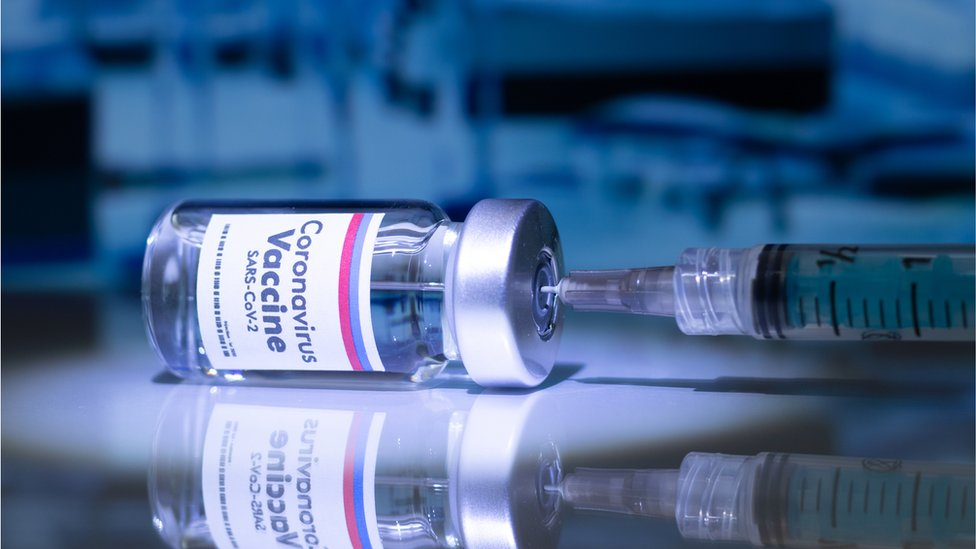

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
from datetime import timedelta
import PIL
from IPython.display import Image
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import seaborn as sns
import textwrap
import pycountry
import urllib
from task_scheduler.connect_mysql import query
warnings.filterwarnings('ignore')
WORKING_PATH = os.getcwd()
Image(filename = rf'{WORKING_PATH}\data\vaccine.jpg')

In [2]:
df_vaccine = pd.read_csv(rf'{WORKING_PATH}\data\full_vaccinations.csv')
df_vaccine['date'] = pd.to_datetime(df_vaccine['date'])
countries = list(df_vaccine['country'].unique()) ### list of unique country
vaccines_name = list(df_vaccine['vaccines'].unique())
### create a dataframe to get all the lastest data of each unique country
data_lastest = pd.DataFrame()
for country in countries:
    temp = df_vaccine[df_vaccine['country']==country].reset_index(drop=True)
    temp = temp.iloc[-1, :]
    data_lastest = data_lastest.append(temp, ignore_index=True)

In [ ]:
### create a overview board about the vaccine status
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
background_color = '#f6f5f5'
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['top','right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
total_vaccine = round(data_lastest['total_vaccinations'].sum()/1000000)
people_vaccined = round(data_lastest['people_vaccinated'].sum()/1000000)
number_vaccines = len(set(data_lastest['vaccines'].to_list()))
lst_vaccines = set([y.strip() for i in data_lastest['vaccines'].to_list() for y in i.split(',')])
people_fully_vaccined = round(data_lastest['people_fully_vaccinated'].sum()/1000000)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'General Overview', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'A quick glance of world vaccination progress', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, len(countries), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nVaccination Program', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.2, 0, len(lst_vaccines), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccines\nused', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.4, 0, total_vaccine, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'million of\ntotal vaccinations', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.65, 0, people_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'million of\npeople vaccinated', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.9, 0, people_fully_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'million of people\nfully vaccinated', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()

In [ ]:
### bar chart to show number single vaccine are using
single_vaccine = data_lastest['vaccines'].value_counts()
single_vaccine = single_vaccine[['Oxford/AstraZeneca', 
                                 'Pfizer/BioNTech', 
                                 'Sputnik V', 
                                 'Sinopharm/Beijing',
                                 'Moderna']].sort_values(ascending=False)

background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(2)]
color_map[0] = '#2693d7'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)
ax0.text(0, -1, 'Single Vaccine', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Oxford/AstraZeneca is the most popular single vaccine', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=single_vaccine.index, x=single_vaccine, zorder=2, orient='h', 
                      linewidth=0.3, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Number of Countries',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccine',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
### dataframe groupby country with max function
country_vaccine = df_vaccine.groupby(['country', 'iso_code', 'vaccines'])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
country_vaccine.columns = ['Country', 'iso_code', 'Vaccines', 'Total vaccinations', 'Percent', 'Daily vaccinations', 
                           'Daily vaccinations per million', 'People vaccinated', 'People vaccinated per hundred',
                           'People fully vaccinated', 'People fully vaccinated percent']

In [ ]:
### treemap with total vaccinations per country
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Total vaccinations',
                title='Total vaccinations per country, grouped by vaccine scheme')
fig.show()

In [ ]:
### treemap with daily vaccinations per country
fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Daily vaccinations',
                title='Daily vaccinations per country, grouped by vaccine scheme')
fig.show()

In [ ]:
### dataframe groupby vaccine and max function
vaccine = df_vaccine.groupby(['vaccines'])['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
vaccine.columns = ['Vaccines', 'Total vaccinations', 'Percent', 'Daily vaccinations', 
                           'Daily vaccinations per million']
def draw_trace_bar_vaccine(data, feature, title, xlab, ylab, color):
    data = data.sort_values(feature, ascending=False).head(15)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'white', paper_bgcolor = 'white',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [ ]:
draw_trace_bar_vaccine(vaccine, 'Total vaccinations', 'Total per vaccine scheme', 'Vaccine', 'Vaccination total', 'darkmagenta' )

In [ ]:
### create bar chart to show vaccine information of top 10 country
def draw_trace_bar(data, feature, title, xlab, ylab, color):
    data = data.sort_values(feature, ascending=False).head(10)
    trace = go.Bar(
            x = data['Country'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Country']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'white', paper_bgcolor = 'white',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [ ]:
draw_trace_bar(country_vaccine, 'Total vaccinations', 'Vaccination total per country', 'Country', 'Vaccination total', 'Darkgreen')
draw_trace_bar(country_vaccine, 'Percent', 'Vaccination percent per country', 'Country', 'Vaccination percent', 'olive')
draw_trace_bar(country_vaccine, 'Daily vaccinations', 'Daily vaccinations per country', 'Country', 'Daily vaccinations', 'red')
draw_trace_bar(country_vaccine, 'People vaccinated', 'People vaccinated per country', 'Country', 'People vaccinated', 'chocolate')
draw_trace_bar(country_vaccine, 'People fully vaccinated', 'People fully vaccinated per country', 'Country', 'People fully vaccinated', 'lightblue')

In [ ]:
### plot map to show vaccine information of the world
def plot_map_vaccine(z_data, colorbar_name, layout_name):
    trace = go.Choropleth(
                locations = country_vaccine['Country'],
                locationmode='country names',
                z = z_data,
                text = country_vaccine['Country'],
                autocolorscale =False,
                reversescale = True,
                colorscale = 'viridis',
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = colorbar_name,
                    tickprefix = '')
            )

    data = [trace]
    layout = go.Layout(
        title = layout_name,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )

    fig = dict(data=data, layout=layout )
    iplot(fig)

In [ ]:
plot_map_vaccine(country_vaccine['Percent'], 'Percentage', 'Total vaccinations per hundred per country')
plot_map_vaccine(country_vaccine['Daily vaccinations'], 'Daily vaccinations', 'Daily vaccinations per country')
plot_map_vaccine(country_vaccine['People vaccinated'], 'People vaccinated', 'People vaccinated per country')
plot_map_vaccine(country_vaccine['People fully vaccinated'], 'People fully vaccinated', 'People fully vaccinated per country')
plot_map_vaccine(country_vaccine['Total vaccinations'], 'Total vaccinations', 'Total vaccinations per country')

In [ ]:
### bar chart to show the count of combine vaccine are using
comb_vaccine = data_lastest['vaccines'].value_counts()
comb_vaccine = comb_vaccine.drop(['Oxford/AstraZeneca', 
                                 'Pfizer/BioNTech', 
                                 'Sputnik V', 
                                 'Sinopharm/Beijing', 
                                 'Moderna']).head(5)
top_combine_vaccine = comb_vaccine.index[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(1)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(0, -1, 'Multiple Vaccines', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, f'Combination of {top_combine_vaccine} vaccine is the most popular', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.3, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Number of Countries',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccines',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 0.7
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

In [5]:
### get daily vaccine day by day
daily_vaccination = df_vaccine.groupby('date')['daily_vaccinations'].sum() / 1000000
background_color = '#f6f5f5'
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%m-%y')

In [ ]:
### line plot to show the daily vaccination of world
peak_vaccination = round(daily_vaccination.max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+5, 'World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+5, f'Non-cumulative daily vaccination which is peaked at {peak_vaccination} million per day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination, zorder=2, linewidth=1)
ax0_sns.set_xlabel('Date', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
### line plot to show cummulative vaccination of world
peak_vaccination = round(daily_vaccination.cumsum().max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, 'Cummulative World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, 'Cumulative daily vaccination is showing an increasing trend', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination.cumsum(), zorder=2, color='#2693d1', linewidth=1)
ax0_sns.set_xlabel('Date',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

7874.494805


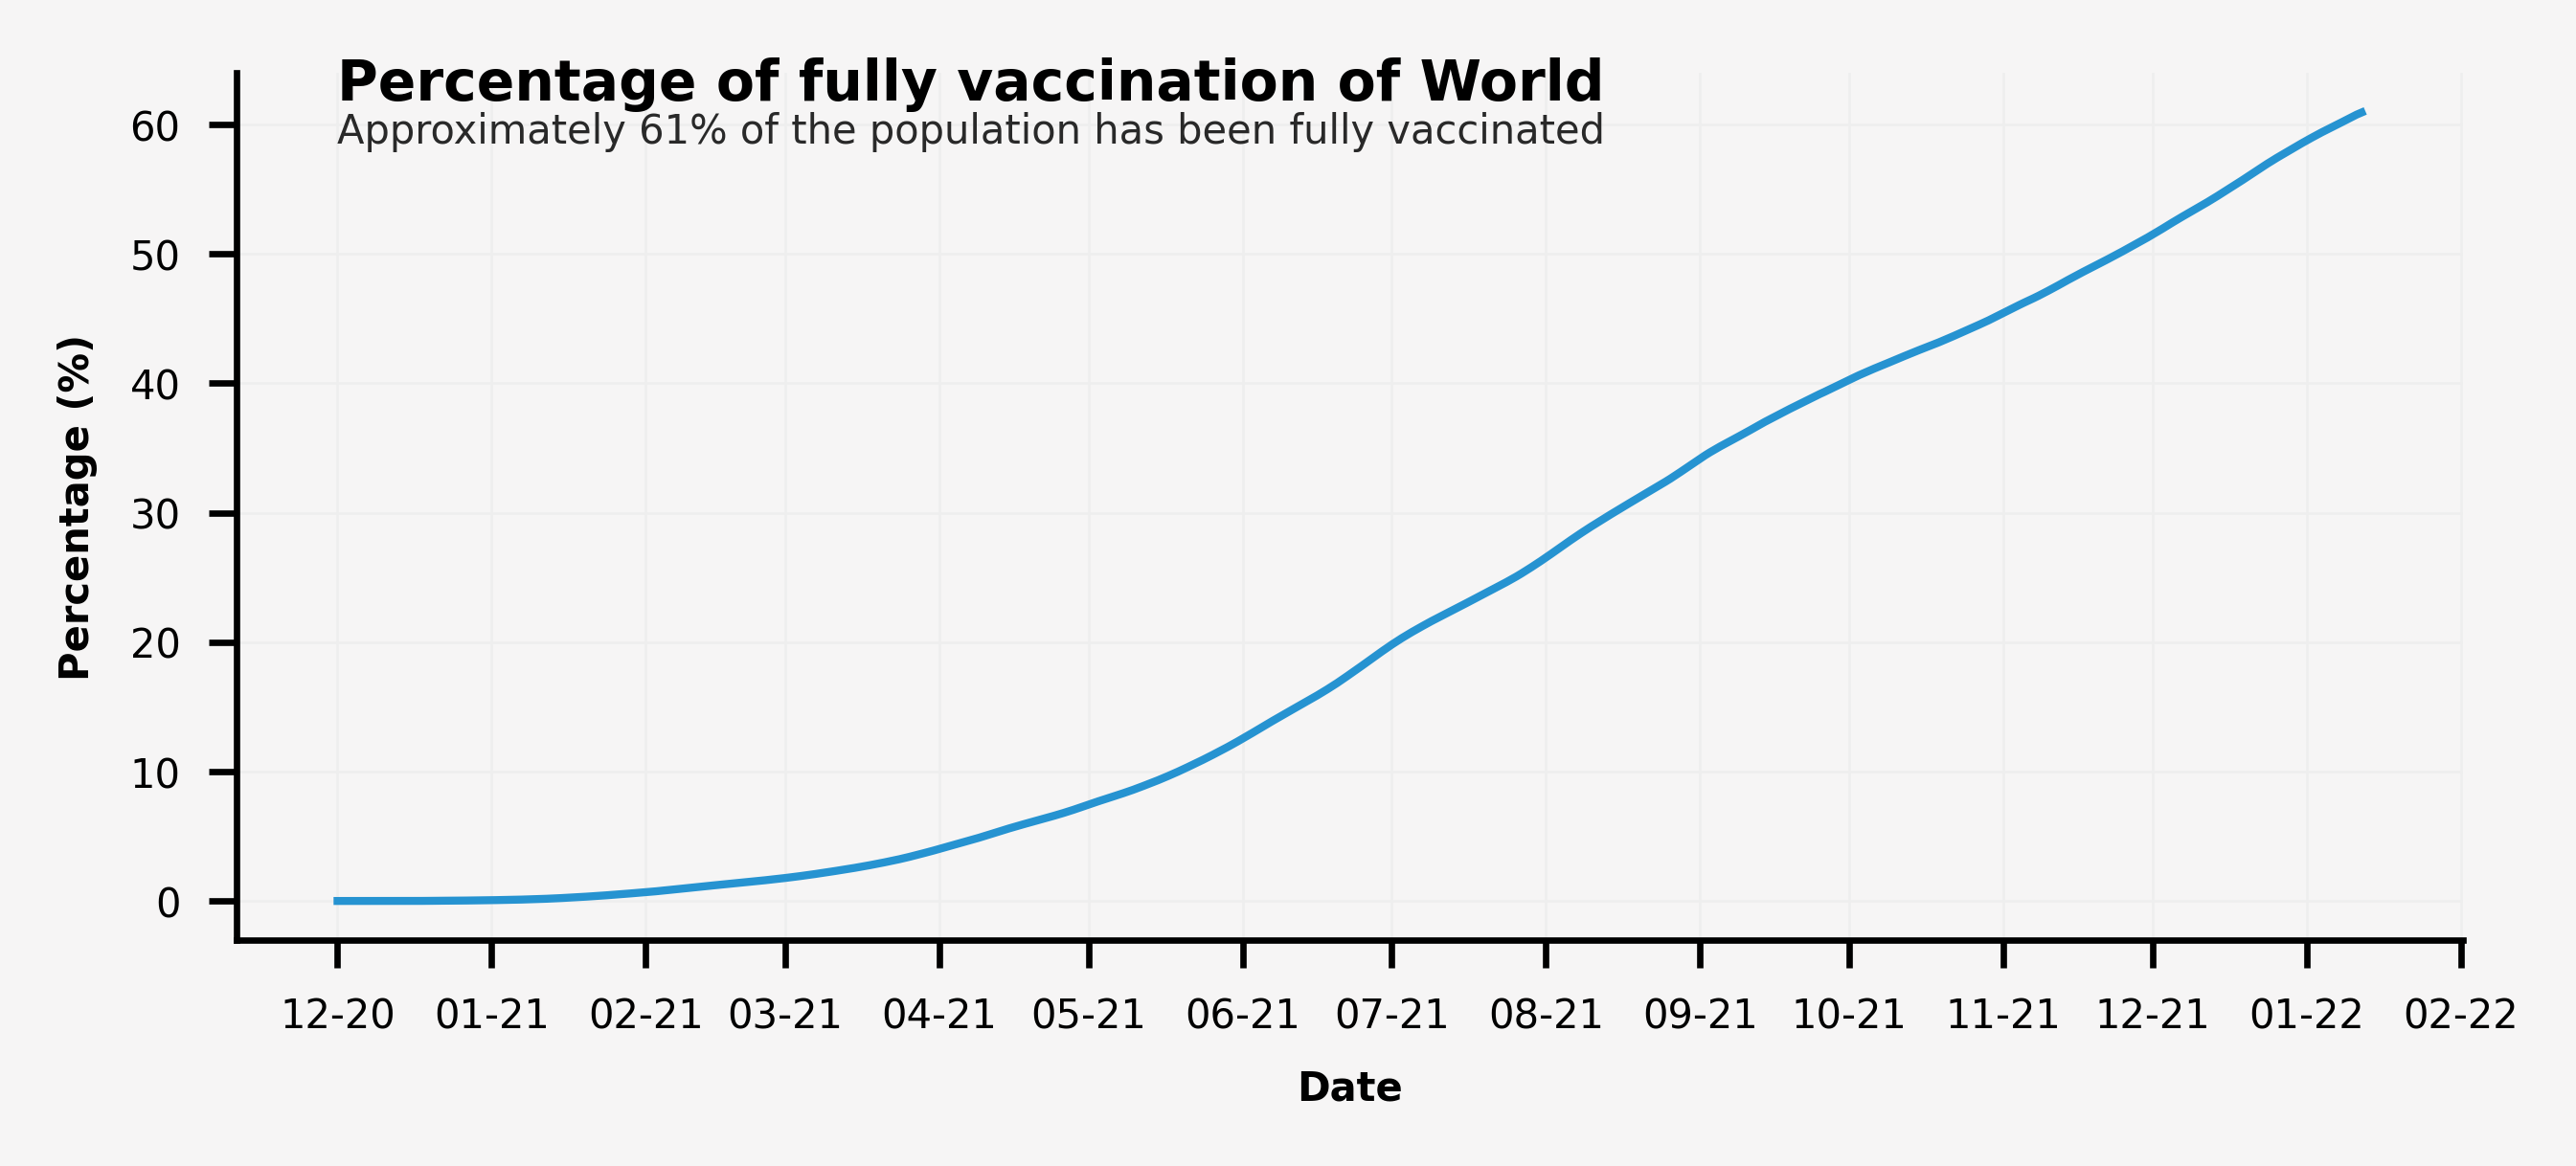

In [20]:
### line plot to show cummulative percentage vaccination of world
df = query(keyw='Read', table_name='SUMMARY_COVID_DATA')
population = df['POPULATION'].sum()/1000000
peak_percent = round((daily_vaccination.cumsum()/2/population*100).max())
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_percent, 'Percentage of fully vaccination of World', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_percent, f'Approximately {peak_percent}% of the population has been fully vaccinated', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination.cumsum()/2/population*100, zorder=2, color='#2693d1', linewidth=1)
ax0_sns.set_xlabel('Date',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Percentage (%)',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
peak_vaccination = round(daily_vaccination.max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.4)

### bar plot to show the distribution of daily vaccine
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0.text(0, peak_vaccination+5, 'World Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, peak_vaccination+5, 'High frequency on high daily vaccination are expected to be happen in the future', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.histplot(ax=ax0, y=daily_vaccination, zorder=2, binwidth=5, linewidth=0.3, edgecolor='black', alpha=1)
ax0_sns.set_xlabel('Frequency', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

### kde plot to show the distribution of daily vaccine
ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0_sns = sns.kdeplot(ax=ax0, x=daily_vaccination, zorder=2, linewidth=1, alpha=1)
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 
ax0.text(x0, y1+0.002, 'World Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(x0, y1+0.002, 'Bimodal distribution suggested there is an increased of daily vaccination', color='#292929', fontsize=5, ha='left', va='top')

ax0_sns.set_xlabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0_sns.set_ylabel('', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
### boxenplot to show daily vaccination on weekday 
daily_vaccination = pd.DataFrame(daily_vaccination).reset_index(drop=False)
daily_vaccination['weekday'] = daily_vaccination['date'].dt.dayofweek
weekday = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
daily_vaccination['weekday'] = daily_vaccination['weekday'].map(weekday)
background_color = '#f6f5f5'

color_map = ['#2693d1' for _ in range(7)]
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0.text(-0.5, peak_vaccination+4, 'World Weekday Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, peak_vaccination+4, 'Daily vaccination distribution from Monday to Friday are about the same', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.boxenplot(ax=ax0, x=daily_vaccination['weekday'], y=daily_vaccination['daily_vaccinations'], 
                        zorder=3, linewidth=1, saturation=1)
ax0_sns.set_xlabel('Day', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
### bar chart to show top 5 country with total vaccination
top5_countries_total_vaccination = data_lastest.sort_values('total_vaccinations', ascending=False)
top5_countries_total_vaccination = top5_countries_total_vaccination[:5]
x_label = round(top5_countries_total_vaccination.head(1)['total_vaccinations']/1000000)
top_country = top5_countries_total_vaccination.head(1)['country'].values[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(5)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(-0.5, x_label+400, 'Top 5 Countries - Total Vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+400, f'{top_country} has the most total vaccinations', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_total_vaccination['country'], 
                      y=top5_countries_total_vaccination['total_vaccinations']/1000000, zorder=2, 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Country', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccination (in million)', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 120
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
### bar chart to show the total number vaccine of top 5 combine vaccine
comb_vaccine = data_lastest.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(26)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Total Vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} is the most used vaccine combination', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Vaccination (in million)',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccine',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 120
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

In [ ]:
top5_countries_vaccinated = data_lastest.sort_values('people_vaccinated', ascending=False)
top5_countries_vaccinated = top5_countries_vaccinated[:5]
x_label = round(top5_countries_vaccinated.head(1)['people_vaccinated']/1000000)
top_country = top5_countries_vaccinated.head(1)['country'].values[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(5)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(-0.5, x_label+160, 'Top 5 Countries - Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+160, f'Consistent with total vaccinations, {top_country} has the most vaccinated people', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_vaccinated['country'], y=top5_countries_vaccinated['people_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Country', fontsize=5, weight='bold')
ax0_sns.set_ylabel('People (in million)', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 50
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
comb_vaccine = data_lastest.groupby('vaccines')['people_vaccinated'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(26)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} has vaccinated people the most', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('People (in million)',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccine',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
top5_countries_fully_vaccinated = data_lastest.sort_values('people_fully_vaccinated', ascending=False)
top5_countries_fully_vaccinated = top5_countries_fully_vaccinated[:5]
x_label = round(top5_countries_fully_vaccinated.head(1)['people_fully_vaccinated'].values[0]/1000000)
top_country = top5_countries_fully_vaccinated.head(2)['country'].values[0]
second_country = top5_countries_fully_vaccinated.head(2)['country'].values[1]

background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(5)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(-0.5, x_label+80, 'Top 5 Countries - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+80, f'{top_country} has surpassed {second_country} in the number of fully vaccinated people ', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_fully_vaccinated['country'], y=top5_countries_fully_vaccinated['people_fully_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Country',fontsize=5, weight='bold')
ax0_sns.set_ylabel('People (in million)',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 25
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

In [ ]:
comb_vaccine = data_lastest.groupby('vaccines')['people_fully_vaccinated'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(26)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} is the most vaccine that has fully vaccinated people', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('People (in million)', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccine', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 20
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
def plot_daily_vaccine(country_name):
    vaccine_country = df_vaccine[df_vaccine['country']==country_name]
    average_vaccine = round(vaccine_country['daily_vaccinations'].sum()/len(vaccine_country['daily_vaccinations']))
    max_vaccine = vaccine_country['daily_vaccinations'].max()/1000
    background_color = '#f6f5f5'

    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%b %Y')

    plt.rcParams['figure.dpi'] = 600
    fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=0, hspace=0)
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_facecolor(background_color)
    for s in ['right', 'top']:
        ax0.spines[s].set_visible(False)
        
    # format the ticks
    ax0.xaxis.set_major_locator(months)
    ax0.xaxis.set_major_formatter(years_fmt)

    ax0.text(pd.Timestamp('1970-1-1'), max_vaccine, f'Daily Vaccination on {country_name}', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
    ax0.text(pd.Timestamp('1970-1-1'), max_vaccine, f'Non-cumulative daily vaccination: average daily vaccination is {average_vaccine}/day', 
            color='#292929', fontsize=5, ha='left', va='top')
    ax0_sns = sns.barplot(ax=ax0, x=vaccine_country['date'], y=vaccine_country['daily_vaccinations']/1000, zorder=2, color='#2693d1', linewidth=0.17, edgecolor='black')
    plt.axhline(np.mean(vaccine_country['daily_vaccinations']/1000), color='red', linewidth=0.8, linestyle='--')
    ax0_sns.set_xlabel('Date', fontsize=5, weight='bold')
    ax0_sns.set_ylabel('Vaccinations (in thousands)', fontsize=5, weight='bold')
    ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
    ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
    ax0_sns.tick_params(labelsize=5)

    ax0.tick_params('both', length=2, which='major', labelsize=5)
    ax0.xaxis.set_major_locator(months)

    list_months = pd.date_range(vaccine_country['date'].min(), vaccine_country['date'].max()+timedelta(days=30), closed=None,
                freq='M').strftime('%m-%y').tolist()     
    ax0.set_xticklabels(list_months)
    ax0.annotate('Average', 
                xy=(np.datetime64('1970-01-13'), average_vaccine/1000), 
                xytext=(np.datetime64('1970-01-13'), average_vaccine/1000), 
                fontsize=5)
    plt.show()
    


In [ ]:
plot_daily_vaccine(input('Choose the country which you want to see daily vaccination: '))

In [ ]:
### bar chart of top 5 country with max daily vaccination
top5_countries_daily_vaccination = df_vaccine.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False)
top5_countries_daily_vaccination = top5_countries_daily_vaccination[:5]
second, third = top5_countries_daily_vaccination.index[1], top5_countries_daily_vaccination.index[2]
y_text = round(top5_countries_daily_vaccination.head(1).values[0]/1000000)
background_color = '#f6f5f5'
color_map = ['lightgray' for _ in range(5)]
color_map[0] = '#2693d1'
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = 'y', which = 'both', left = False)

ax0.text(-0.5, y_text+4, 'Top 5 Countries - Highest Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, y_text+4, f'{second} & {third} are in posistion 2 & 3 for highest daily vaccination', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_daily_vaccination.index, y=top5_countries_daily_vaccination/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel('Country',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)',fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 1.3
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

In [ ]:
### get the vaccination percent by total_vaccinations column
df_vaccine_percent = df_vaccine.groupby('date')[['total_vaccinations']].sum()/1000
df_vaccine_percent['% vaccine'] = round((df_vaccine_percent['total_vaccinations']/2/7825000)*100,2)

In [ ]:
country_vaccine_time = df_vaccine[['country', 'vaccines', 'date', 'total_vaccinations', 
                                'total_vaccinations_per_hundred',  'people_vaccinated','people_vaccinated_per_hundred',
                               'daily_vaccinations','daily_vaccinations_per_million', 
                                'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']].dropna()
country_vaccine_time.columns = ['Country', 'Vaccines', 'Date', 'Total vaccinations', 'Percent', 'People vaccinated', 'People percent',
                               'Daily vaccinations', 'Daily vaccinations per million', 
                                'People fully vaccinated', 'People fully vaccinated percent']

In [ ]:
### scatter plot for selected country
def plot_time_variation_countries_group(data_df, feature, title, countries):
    data = []
    for country in countries:
        df = data_df.loc[data_df.Country==country]
        trace = go.Scatter(
            x = df['Date'],y = df[feature],
            name=country,
            mode = 'markers+lines',
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=df['Country'])
        data.append(trace)
    layout = dict(title = title,
          xaxis = dict(title = 'Date', showticklabels=True,zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=3, linecolor='black', mirror=True,
                       tickfont=dict(size=10,color='darkblue'),), 
          yaxis = dict(title = feature, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=3, linecolor='black', mirror=True, type='log'),
                       plot_bgcolor = 'white', paper_bgcolor = 'white',
         hovermode = 'x', 
         height=800
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='all_countries')

In [ ]:
countries = [input(f'Country {num+1}') for num in range(int(input('Select the number of countries you want to see: ')))]

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Total vaccinations', 'Total vaccination evolution', countries)
plot_time_variation_countries_group(country_vaccine_time, 'Percent', 'Total vaccination percent evolution', countries)

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People vaccinated', 'People vaccinated evolution', countries)
plot_time_variation_countries_group(country_vaccine_time, 'People percent', 'People vaccinated percent evolution', countries)

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'People fully vaccinated', 'People fully vaccinated evolution', countries)
plot_time_variation_countries_group(country_vaccine_time, 'People fully vaccinated percent', 'People fully vaccinated percent evolution', countries)

In [ ]:
plot_time_variation_countries_group(country_vaccine_time, 'Daily vaccinations', 'Daily vaccinations evolution', countries)
plot_time_variation_countries_group(country_vaccine_time, 'Daily vaccinations per million', 'Daily vaccinations per million evolution', countries)

In [ ]:
df = df_vaccine[['date', 'country', 'daily_vaccinations']]
df.loc[:, 'TotalVaccination'] = df.groupby('country')['daily_vaccinations'].cumsum()
pivot = df.pivot(index = 'date', columns = 'country', values = 'TotalVaccination')
pivot.index = pd.to_datetime(pivot.index)
expanded_df = pivot.asfreq('12H')
rank_df = expanded_df.rank(axis = 1, method = 'first', ascending = False)
expanded_df = expanded_df.interpolate()
rank_df = rank_df.interpolate()

In [ ]:
countries_flag = pd.read_csv(rf'{WORKING_PATH}\data\countries_continents_codes_flags_url.csv')
colors_dict = {
    'Africa': '#F1480F', 
    'Americas': '#9736FF', 
    'Asia': '#101820', 
    'Europe': '#0EB8F1', 
    'Oceania': '#008B97'
}
sns.palplot(['#F1480F', '#9736FF', '#101820', '#0EB8F1', '#008B97'])

In [ ]:
continent_dict = dict(zip(countries_flag['country'], countries_flag['region']))
continent_dict['England'] = 'Europe'
continent_dict['Scotland'] = 'Europe'
continent_dict['Northern Ireland'] = 'Europe'
continent_dict['Wales'] = 'Europe'
continent_dict['Czechia'] = 'Europe'
countries_code = {}
for country in expanded_df.columns:    
    try:
        countries_code[country] = pycountry.countries.search_fuzzy(country)[0].alpha_2
    except:
        print(country)

In [ ]:
countries_code['Bonaire Sint Eustatius and Saba'] = 'BQ'
countries_code['Cape Verde'] = 'CV'
countries_code['Democratic Republic of Congo'] = 'CD'
countries_code['Faeroe Islands'] = 'FO'
countries_code['Laos'] = 'LA'
countries_code['Northern Cyprus'] = 'CY'
countries_code['South Korea'] = 'KR'

In [ ]:
for (key, item) in countries_code.items():
    if item == 'GB':
        print(key)

In [ ]:
countries_code['England'] = 'GB-ENG'
countries_code['Northern Ireland'] = 'GB-NIR'
countries_code['Scotland'] = 'GB-SCT'
countries_code['Wales'] = 'GB-WLS'

In [ ]:
img_dict = {}
for col in expanded_df.columns:
    img = PIL.Image.open(urllib.request.urlopen(f'https://raw.githubusercontent.com/google/region-flags/gh-pages/png/{countries_code[col]}.png'))
    img_dict[col] = img.convert('RGB')

In [ ]:
legend = []
for (continent, color) in colors_dict.items():
    legend.append(Patch(facecolor = color, edgecolor = '#101820', alpha = 0.8, label = continent))

In [ ]:
n_bars = 20
def get_bar_info(time):    
    bar_location = rank_df.iloc[time].values
    top_filt = (bar_location > 0) & (bar_location < n_bars + 1)
    bar_location = bar_location[top_filt]
    bar_length = expanded_df.iloc[time].values[top_filt]
    cols = expanded_df.columns[top_filt]
    colors = [colors_dict[continent_dict[x]] for x in cols]    
    return bar_location, bar_length, cols, colors

In [ ]:
def update(time):        
    bar_location, bar_length, cols, colors = get_bar_info(time)
    
    ax.clear()
    ax.set_facecolor('#E5E5E5')
    ax.tick_params(labelsize = 6)
    ax.grid(True, axis = 'x', color = '#A4A4A4', linestyle = '--', alpha = 0.2)
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.set_ylim(0.2, 20.8)
    
    ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e6))
    ax.xaxis.set_major_formatter(ticks)

    ax.barh(
        y = bar_location,
        width = bar_length,
        tick_label = cols,
        height = 0.8,
        color = colors,
        edgecolor = '#101820',
        alpha = 0.8
    )
        
    for i, col in enumerate(cols):
        
        img = img_dict[col]
        img = img.resize((100, 100))
        im = OffsetImage(img, zoom = 0.1)
        im.image.axes = ax

        ab = AnnotationBbox(
            im,
            (bar_length[i], bar_location[i]), 
            xybox = (-20, 0),
            frameon = False, 
            xycoords = 'data',
            boxcoords = 'offset points',
            pad = 0)
        
        ax.text(bar_length[i] + max(bar_length) / 100, bar_location[i] + 0.3, '{:,}'.format(int(bar_length[i])), size = 5)

        ax.add_artist(ab)

    date = expanded_df.index[time].strftime('%d %B, %Y')
    ax.text(0.95, 0.4, date, transform = ax.transAxes, color = '#101820', size = 22, ha = 'right', weight = 800)
    
    total_vaccination = expanded_df.iloc[time].sum()
    ax.text(0.95, 0.3, 'Total Vaccination for World:    {:,}'.format(int(total_vaccination)), 
            transform = ax.transAxes, color = '#101820', size = 6, ha = 'right', weight = 400)
    
    ax.text(1.05, 0, 'Millions', transform = ax.transAxes, color = '#101820', size = 5, ha = 'right', weight = 400)
    
    ax.legend(handles = legend, bbox_to_anchor=(-0.01, 0.95, 0.33, 0.1), ncol = 5,
              fontsize = 4.5, facecolor = '#E5E5E5', edgecolor = '#E5E5E5')

    ax.set_title('COVID-19 World Vaccination Progress\n')
    ax.text(1.05, 0.1, 'kaggle.com/mustafacicek \nlinkedin.com/in/mustafa-cicek/', 
            transform = ax.transAxes, color = '#101820', alpha = 0.2, ha = 'right', size = 4)
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(pad = 20)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300, facecolor = '#E5E5E5')
plt.close()

animator = FuncAnimation(
    fig, 
    update, 
    frames = range(16, len(expanded_df)), 
    interval = 100, 
    repeat = True, 
    save_count = range(16, len(expanded_df))
)

In [ ]:
### create a html bar chart running
plt.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg-20210728-0068b3d0f0-win64-static\bin\ffmpeg.exe'
plt.rcParams['animation.embed_limit'] = 2**128
HTML(animator.to_jshtml())

In [ ]:
from task_scheduler.connect_mysql import query
### merge and validate confirmed_df with continent
sum_country = query(keyw='Read', table_name='SUMMARY_COVID_DATA')[['NAME', 'CONTINENT', 'TOTAL_CASES', 'TOTAL_DEATHS', 'TOTAL_RECOVERED', 'ACTIVE_CASES', 'SERIOUS_CRITICAL', 'FATALITY_RATE']]
def merge_continent(df):
    df_continent = pd.merge(left=df, right=sum_country[['NAME', 'CONTINENT']], left_on='country', right_on='NAME', how='left').drop(columns='NAME')
    df_continent = df_continent.set_index('country')
    df_continent.loc[['South Korea', 'United Arab Emirates', 'Timor', 'Turkmenistan'], 'CONTINENT'] = 'Asia'
    df_continent.loc[['Central African Republic', 'Democratic Republic of Congo', "Cote d'Ivoire", 'Cape Verde', 'Curacao'], 'CONTINENT'] = 'Africa'
    df_continent.loc[['United States', 'Bonaire Sint Eustatius and Saba'], 'CONTINENT'] = 'North America'
    df_continent.loc[['Tuvalu', 'Samoa', 'Tonga', 'Tokelau', 'Nauru', 'Niue', 'Saint Helena', 'Pitcairn', 'Cook Islands'], 'CONTINENT'] = 'Australia/Oceania'
    df_continent.loc[['United Kingdom', 'Kosovo', 'England', 'Scotland', 'Wales', 'Northern Ireland', 'Guernsey', 'Northern Cyprus', 'Jersey', 'Sint Maarten (Dutch part)'], 'CONTINENT'] = 'Europe'
    df_continent.loc[['Kiribati', 'Saint Vincent and the Grenadines', 'Turks and Caicos Islands'], 'CONTINENT'] = 'Unknown'
    df_continent.reset_index(inplace=True)
    return df_continent

In [ ]:
data_lastest_continent = merge_continent(data_lastest)
df_vaccine_continent = merge_continent(df_vaccine)
data_lastest_asia = data_lastest_continent[data_lastest_continent['CONTINENT'] == 'Asia']
df_vaccine_asia = df_vaccine_continent[df_vaccine_continent['CONTINENT'] == 'Asia']

In [ ]:
### create a overview board about the vaccine status in Asia
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
background_color = '#f6f5f5'
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['top','right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
num_country = len(data_lastest_asia['country'].values)
total_vaccine = round(data_lastest_asia['total_vaccinations'].sum()/1000000)
people_vaccined = round(data_lastest_asia['people_vaccinated'].sum()/1000000)
number_vaccines = len(set(data_lastest_asia['vaccines'].to_list()))
lst_vaccines = set([y.strip() for i in data_lastest_asia['vaccines'].to_list() for y in i.split(',')])
people_fully_vaccined = round(data_lastest_asia['people_fully_vaccinated'].sum()/1000000)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'General Overview', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'A quick glance of Asia vaccination progress', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, num_country, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nVaccination Program', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.2, 0, len(lst_vaccines), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccines\nused', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.4, 0, total_vaccine, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'million of\ntotal vaccinations', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.65, 0, people_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'million of\npeople vaccinated', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.9, 0, people_fully_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'million of people\nfully vaccinated', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()

In [ ]:
### get daily vaccine day by day
daily_vaccination_asia = df_vaccine_asia.groupby(['country', 'date'], as_index=False)['daily_vaccinations'].sum()
daily_vaccination_asia['daily_vaccinations'] = daily_vaccination_asia['daily_vaccinations'] / 1000000
background_color = '#f6f5f5'
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%m-%y')

In [ ]:
top10_vaccine_asia = data_lastest_asia.sort_values(by='total_vaccinations', ascending=False).head(10)['country'].values
top10_daily_vaccine = daily_vaccination_asia[daily_vaccination_asia['country'].isin(top10_vaccine_asia)]

In [ ]:
### line plot to show the daily vaccination of top 10 country in Asia
peak_vaccination = round(daily_vaccination_asia['daily_vaccinations'].max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+2, 'Top 10 Country in Asia Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+2, f'Non-cumulative daily vaccination which is peaked at {peak_vaccination} million per day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=top10_daily_vaccine['date'], y=top10_daily_vaccine['daily_vaccinations'], zorder=2, linewidth=1, hue=top10_daily_vaccine['country'])
ax0_sns.set_xlabel('Date', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0_sns.legend(fontsize=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
### line plot to show cummulative vaccination of top 10 country in Asia
top10_daily_vaccine['daily_csum'] = top10_daily_vaccine.groupby(['country'])['daily_vaccinations'].cumsum()
peak_vaccination = round(top10_daily_vaccine['daily_csum'].max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+300, 'Cummulative Asia Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination+300, 'Cumulative daily vaccination is showing an increasing trend', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=top10_daily_vaccine['date'], y=top10_daily_vaccine['daily_csum'], zorder=2, linewidth=1, hue=top10_daily_vaccine['country'])
ax0_sns.set_xlabel('Date',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)',fontsize=5, weight='bold')
ax0_sns.legend(fontsize=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
asia_vaccine_time = df_vaccine_asia[['country', 'vaccines', 'date', 'total_vaccinations', 
                                'total_vaccinations_per_hundred',  'people_vaccinated','people_vaccinated_per_hundred',
                               'daily_vaccinations','daily_vaccinations_per_million', 
                                'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']].dropna()
asia_vaccine_time.columns = ['Country', 'Vaccines', 'Date', 'Total vaccinations', 'Percent', 'People vaccinated', 'People percent',
                               'Daily vaccinations', 'Daily vaccinations per million', 
                                'People fully vaccinated', 'People fully vaccinated percent']

In [ ]:
### scatter plot for country
def plot_time_variation(data_df, feature, title, countries):
    data = []
    for country in countries:
        df = data_df.loc[data_df.Country==country]
        trace = go.Scatter(
            x = df['Date'],y = df[feature],
            name=country,
            mode = 'markers+lines',
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=df['Country'])
        data.append(trace)
    layout = dict(title = title,
          xaxis = dict(title = 'Date', showticklabels=True,zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=3, linecolor='black', mirror=True,
                       tickfont=dict(size=10,color='darkblue'),), 
          yaxis = dict(title = feature, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=3, linecolor='black', mirror=True, type='log'),
                       plot_bgcolor = 'white', paper_bgcolor = 'white',
         hovermode = 'x', 
         height=800
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='top10_asia')

In [ ]:
plot_time_variation(asia_vaccine_time, 'Total vaccinations', 'Total vaccination evolution', top10_vaccine_asia)
plot_time_variation(asia_vaccine_time, 'Percent', 'Total vaccination percent evolution', top10_vaccine_asia)

In [ ]:
plot_time_variation(asia_vaccine_time, 'People vaccinated', 'People vaccinated evolution', top10_vaccine_asia)
plot_time_variation(asia_vaccine_time, 'People percent', 'People vaccinated percent evolution', top10_vaccine_asia)

In [ ]:
plot_time_variation(asia_vaccine_time, 'People fully vaccinated', 'People fully vaccinated evolution', top10_vaccine_asia)
plot_time_variation(asia_vaccine_time, 'People fully vaccinated percent', 'People fully vaccinated percent evolution', top10_vaccine_asia)

In [ ]:
plot_time_variation(asia_vaccine_time, 'Daily vaccinations', 'Daily vaccinations evolution', top10_vaccine_asia)
plot_time_variation(asia_vaccine_time, 'Daily vaccinations per million', 'Daily vaccinations per million evolution', top10_vaccine_asia)

In [ ]:
vnam_daily_vaccine = daily_vaccination_asia[daily_vaccination_asia['country'] == 'Vietnam'][['date', 'daily_vaccinations']]
peak_vaccination = round(vnam_daily_vaccine['daily_vaccinations'].max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.4)

### bar plot to show the distribution of daily vaccine
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0.text(0, peak_vaccination+0.5, 'Vietnam Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, peak_vaccination+0.5, 'High frequency on high daily vaccination are expected to be happen in the future', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.histplot(ax=ax0, y=vnam_daily_vaccine['daily_vaccinations'], zorder=2, binwidth=0.2, linewidth=0.3, edgecolor='black', alpha=1)
ax0_sns.set_xlabel('Frequency', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

### kde plot to show the distribution of daily vaccine
ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0_sns = sns.kdeplot(ax=ax0, x=vnam_daily_vaccine['daily_vaccinations'], zorder=2, linewidth=1, alpha=1)
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 
ax0.text(x0, y1+0.01, 'Vietnam Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(x0, y1+0.01, 'Bimodal distribution suggested there is an increased of daily vaccination', color='#292929', fontsize=5, ha='left', va='top')

ax0_sns.set_xlabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0_sns.set_ylabel('', fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

SEA Vaccinaton Progress

In [3]:
sea_countries = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar','Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam']
data_lastest_sea = data_lastest[data_lastest['country'].isin(sea_countries)]
df_vaccine_sea = df_vaccine[df_vaccine['country'].isin(sea_countries)]

In [4]:
data_lastest_sea

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
29,Brunei,BRN,2021-12-31,898401.0,405888.0,400691.0,6347.0,203.47,91.93,90.75,14375.0,"Oxford/AstraZeneca, Sinopharm/Beijing"
33,Cambodia,KHM,2022-01-12,31218844.0,14296897.0,13699943.0,78287.0,184.22,84.37,80.84,4620.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm..."
92,Indonesia,IDN,2022-01-12,290103068.0,172155594.0,117947474.0,935530.0,104.97,62.29,42.68,3385.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
109,Laos,LAO,2022-01-03,NaN,4590479.0,3643020.0,NaN,NaN,62.21,49.37,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
121,Malaysia,MYS,2022-01-12,60035273.0,26034173.0,25663646.0,206702.0,183.17,79.43,78.30,6306.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
135,Myanmar,MMR,2022-01-01,36388358.0,20816441.0,15571917.0,215682.0,66.39,37.98,28.41,3935.0,"Oxford/AstraZeneca, Sinopharm/Beijing"
157,Philippines,PHL,2022-01-12,116284392.0,NaN,53905973.0,772688.0,104.72,NaN,48.54,6958.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
178,Singapore,SGP,2022-01-10,12132375.0,4821829.0,4726199.0,50281.0,222.47,88.42,86.66,9220.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
197,Thailand,THA,2021-12-27,102681943.0,51032649.0,45423045.0,374147.0,146.79,72.96,64.94,5349.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
217,Vietnam,VNM,2022-01-11,163533682.0,78413199.0,NaN,1130064.0,166.58,79.88,NaN,11511.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."


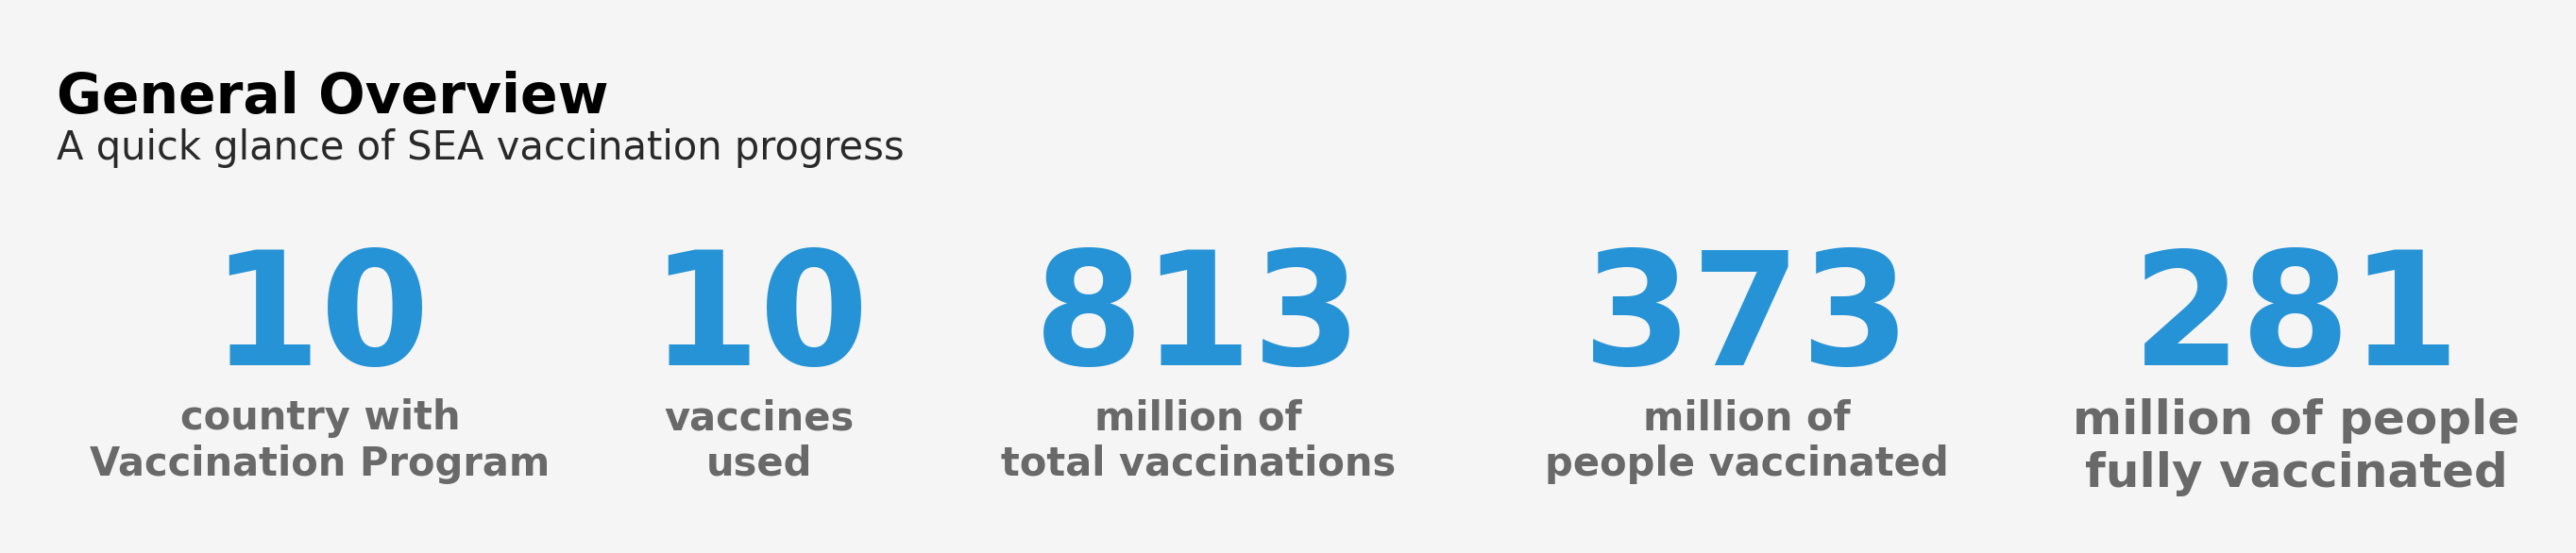

In [5]:
### create a overview board about the vaccine status in SEA
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
background_color = '#f6f5f5'
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['top','right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
num_country = len(data_lastest_sea['country'].values)
total_vaccine = round(data_lastest_sea['total_vaccinations'].sum()/1000000)
people_vaccined = round(data_lastest_sea['people_vaccinated'].sum()/1000000)
number_vaccines = len(set(data_lastest_sea['vaccines'].to_list()))
lst_vaccines = set([y.strip() for i in data_lastest_sea['vaccines'].to_list() for y in i.split(',')])
people_fully_vaccined = round(data_lastest_sea['people_fully_vaccinated'].sum()/1000000)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'General Overview', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'A quick glance of SEA vaccination progress', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, num_country, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nVaccination Program', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.2, 0, len(lst_vaccines), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccines\nused', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.4, 0, total_vaccine, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'million of\ntotal vaccinations', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.65, 0, people_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'million of\npeople vaccinated', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.9, 0, people_fully_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'million of people\nfully vaccinated', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()

In [ ]:
### get daily vaccine day by day
daily_vaccination_sea = df_vaccine_sea.groupby(['country', 'date'], as_index=False)['daily_vaccinations'].sum()
daily_vaccination_sea['daily_vaccinations'] = daily_vaccination_sea['daily_vaccinations'] / 1000000
background_color = '#f6f5f5'
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%m-%y')

In [ ]:
### line plot to show the daily vaccination of SEA
peak_vaccination = round(daily_vaccination_sea['daily_vaccinations'].max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2021-01-01'), peak_vaccination+0.3, 'SEA Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2021-01-01'), peak_vaccination+0.3, f'Non-cumulative daily vaccination which is peaked at {peak_vaccination} million per day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination_sea['date'], y=daily_vaccination_sea['daily_vaccinations'], zorder=2, linewidth=1, hue=daily_vaccination_sea['country'])
ax0_sns.set_xlabel('Date', fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)', fontsize=5, weight='bold')
ax0_sns.legend(fontsize=4)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
### line plot to show cummulative vaccination of top 10 country in Asia
daily_vaccination_sea['daily_csum'] = daily_vaccination_sea.groupby(['country'])['daily_vaccinations'].cumsum()
peak_vaccination = round(daily_vaccination_sea['daily_csum'].max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2021-01-01'), peak_vaccination+30, 'Cummulative SEA Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2021-01-01'), peak_vaccination+30, 'Cumulative daily vaccination is showing an increasing trend', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination_sea['date'], y=daily_vaccination_sea['daily_csum'], zorder=2, linewidth=1, hue=daily_vaccination_sea['country'])
ax0_sns.set_xlabel('Date',fontsize=5, weight='bold')
ax0_sns.set_ylabel('Vaccinations (in million)',fontsize=5, weight='bold')
ax0_sns.legend(fontsize=4)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

In [ ]:
sea_vaccine_time = asia_vaccine_time[asia_vaccine_time['Country'].isin(sea_countries)]

In [ ]:
plot_time_variation(sea_vaccine_time, 'Total vaccinations', 'Total vaccination evolution', sea_countries)
plot_time_variation(sea_vaccine_time, 'Percent', 'Total vaccination percent evolution', sea_countries)

In [ ]:
plot_time_variation(sea_vaccine_time, 'People vaccinated', 'People vaccinated evolution', sea_countries)
plot_time_variation(sea_vaccine_time, 'People percent', 'People vaccinated percent evolution', sea_countries)

In [ ]:
plot_time_variation(sea_vaccine_time, 'People fully vaccinated', 'People fully vaccinated evolution', sea_countries)
plot_time_variation(sea_vaccine_time, 'People fully vaccinated percent', 'People fully vaccinated percent evolution', sea_countries)

In [ ]:
plot_time_variation(sea_vaccine_time, 'Daily vaccinations', 'Daily vaccinations evolution', sea_countries)
plot_time_variation(sea_vaccine_time, 'Daily vaccinations per million', 'Daily vaccinations per million evolution', sea_countries)